### Exercise 3
## Data representation and feature engineering

In this excercise we want to accurately represent all of the numerical columns.
We can also use this section to do some feature engineering.
Let's look back to the data description to see where there could be room for improvement

In [17]:
f = open('data/breast-cancer.names', 'r')
file_contents = f.read()
print(file_contents)
f.close()

Citation Request:
   This breast cancer domain was obtained from the University Medical Centre,
   Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and 
   M. Soklic for providing the data.  Please include this citation if you plan
   to use this database.

1. Title: Breast cancer data (Michalski has used this)

2. Sources: 
   -- Matjaz Zwitter & Milan Soklic (physicians)
      Institute of Oncology 
      University Medical Center
      Ljubljana, Yugoslavia
   -- Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 11 July 1988

3. Past Usage: (Several: here are some)
     -- Michalski,R.S., Mozetic,I., Hong,J., & Lavrac,N. (1986). The 
        Multi-Purpose Incremental Learning System AQ15 and its Testing 
        Application to Three Medical Domains.  In Proceedings of the 
        Fifth National Conference on Artificial Intelligence, 1041-1045,
        Philadelphia, PA: Morgan Kaufmann.
        -- accuracy range: 66%-72%
     -

Some columns we may want to refactor are the `age`, `tumor-size`, and `inv-nodes` columns. Currently, they are treated as categorical columns, but ideally we would use the actual value opposed to a given range. The reason is that there may be some nuanced correlations to the given columns that we may be missing by traeting the columns as categorical, such as whether there is a correlation between age and the recurrence of tumors.

Since we do not have access to the actual values we could use minimum number in the range provided as a proxy that would preserve the ordinality of the field.

We begin load in the data and the original data

In [18]:
import pandas as pd
data = pd.read_csv('data/breast_cancer_feats_a2.csv')
data_orig = pd.read_csv('data/breast_cancer_feats.csv')

To get the first value in the range we will use some regular expressions to choose the number before the hypen and return it. For this we will create a function and applt it to every row in the dataframe.

In [19]:
import re
def first_num_in_range(range_str):
    regex = r'(\d{1,3})-\d{1,3}' # return first number before the hypen if number between 1 and 3 digits
    re_match = re.match(regex, range_str)
    if re_match is not None:
        # return the number
        return int(re_match.group(1))
    else:
        return None

Apply the function to the `age` column from the orginal dataset and verify via the first few rows.

In [20]:
data_orig['age_min'] = data_orig['age'].apply(first_num_in_range)
data_orig[['age', 'age_min']].head()

,age,age_min
0,30-39,30
1,40-49,40
2,40-49,40
3,60-69,60
4,40-49,40


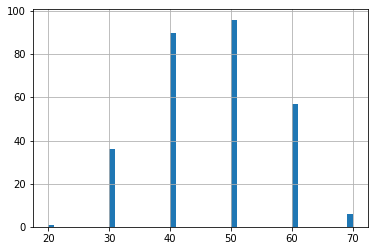

In [21]:
%matplotlib inline
data_orig['age_min'].hist(bins=50)

Apply the same function to the `tumor-size` and `inv-nodes` columns and verify by looking at the first few rows.

In [22]:
data_orig['tumor_size_min'] = data_orig['tumor-size'].apply(first_num_in_range)
data_orig[['tumor-size', 'tumor_size_min']].head()

,tumor-size,tumor_size_min
0,30-34,30
1,20-24,20
2,20-24,20
3,15-19,15
4,0-4,0


In [23]:
data_orig['inv_nodes_min'] = data_orig['inv-nodes'].apply(first_num_in_range)
data_orig[['inv-nodes', 'inv_nodes_min']].head()

,inv-nodes,inv_nodes_min
0,0-2,0
1,0-2,0
2,0-2,0
3,0-2,0
4,0-2,0


Join the new columns with the formatted dataset and drop the redundant columns

In [31]:
data = pd.concat([data, data_orig[['age_min', 'inv_nodes_min', 'tumor_size_min']]], axis=1)

drop_cols = ['age_30-39', 'age_40-49','age_50-59','age_60-69','age_70-79',
             'tumor-size_0-4', 'tumor-size_5-9','tumor-size_10-14', 'tumor-size_15-19',
             'tumor-size_20-24', 'tumor-size_25-29', 'tumor-size_30-34',
             'tumor-size_35-39', 'tumor-size_40-44', 'tumor-size_45-49',
             'inv-nodes_0-2', 'inv-nodes_12-14', 'inv-nodes_15-17',
             'inv-nodes_3-5', 'inv-nodes_6-8', 'inv-nodes_9-11']
data.drop(drop_cols, inplace=True, axis=1)

Finally, we save the feature dataset to a csv file for use later.

In [32]:
data.to_csv('data/breast_cancer_feats_e3.csv')